# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['MEDV'])
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
from sklearn.linear_model import LinearRegression # training linearegression model on the data, predictions on both training and testing set.

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [ ]:
from sklearn.metrics import r2_score 

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R-Squared Training", r2_train)
print("R-Squared Test", r2_test)

R-Squared Training 0.7730135569264234
R-Squared Test 0.5892223849182503


In [ ]:
# r2 score of the training explains 77% and on the testing it is 58%, this suggests that it works well on the training but in testing it drops in performance.
# Suggesting overfitting. 

## 4. Calculate and print mean squared error for both the training and the testing set.

In [9]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE Training", mse_train)
print("MSE Test", mse_test)

MSE Training 19.326470203585725
MSE Test 33.44897999767657


In [ ]:
# Training MSE = 19.32
# Testing MSE = 33.45

# Higher MSE on the test set suggest that the error is larger and is struggling with unseen data. 

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [12]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Mae Training", mae_train)
print("Mae Test", mae_test)

Mae Training 3.1031563965794424
Mae Test 3.842909220444503


In [ ]:
# The absolute error is a bit easier to udnerstand as it 
# predicts house prices with an absolute error between 3100 and 3800 dollars. 
# It gives the error in the same unit as the target (in 1000 dollars)

## Classification Model Evaluation

In [13]:
from sklearn.datasets import load_iris
data = load_iris()

In [14]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [15]:
column_names = data.feature_names

In [16]:
df = pd.DataFrame(data['data'],columns=column_names)

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
target = pd.DataFrame(data.target)

In [19]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [20]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [27]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data['data'], columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [28]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train.values.ravel())

y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [29]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Accuracy Train", acc_train)
print("Accuracy Test", acc_test)

Accuracy Train 0.975
Accuracy Test 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [24]:
from sklearn.metrics import balanced_accuracy_score

bal_acc_train = balanced_accuracy_score(y_train, y_train_pred)
bal_acc_test = balanced_accuracy_score(y_test, y_test_pred)

print("balanced accuracy - training", bal_acc_train)
print("balanced accuracy - testing", bal_acc_test)

balanced accuracy - training 0.975609756097561
balanced accuracy - testing 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [25]:
from sklearn.metrics import precision_score

prec_train = precision_score(y_train, y_train_pred, average='macro')
prec_test = precision_score(y_test, y_test_pred, average='macro')

print("Precision Training", prec_train)
print("Precision Test", prec_test)



Precision Training 0.9761904761904763
Precision Test 1.0


In [31]:
print("Training size:", len(y_train))
print("Testing size:", len(y_test))

Training size: 120
Testing size: 30


In [ ]:
# High precision could be due to a small test set and large training set. 

## 11. Calculate and print the recall score for both the training and the testing set.

In [32]:
from sklearn.metrics import recall_score

recall_train = recall_score(y_train, y_train_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')

print("Recall Training", recall_train)
print("Recall Testing", recall_test)

Recall Training 0.975609756097561
Recall Testing 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [33]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("F1 Score training", f1_train)
print("F1 Score test", f1_test)

F1 Score training 0.974996093139553
F1 Score test 1.0


## 13. Generate confusion matrices for both the training and the testing set.

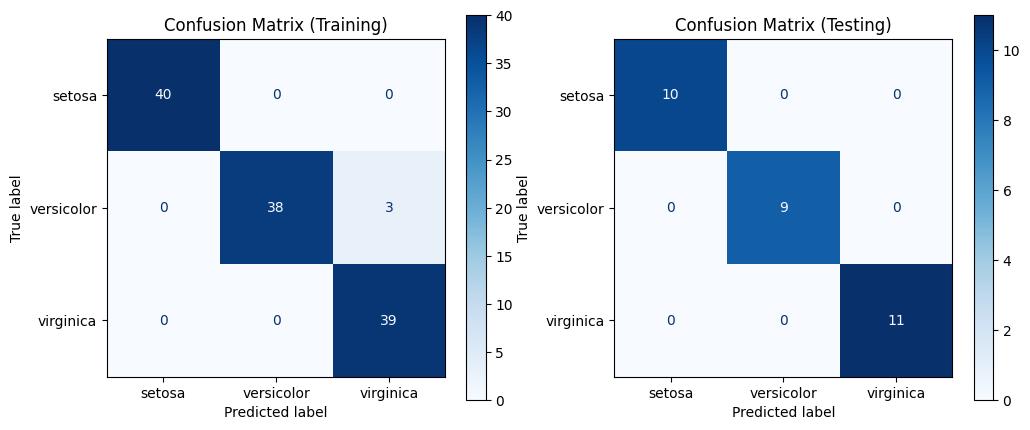

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Creating figure with two subplots

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=data.target_names)
disp_train.plot(cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Training)")

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=data.target_names)
disp_test.plot(cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix (Testing)")

plt.show()

In [ ]:
# as seen in the CM of testing, the accuracy is absolute as it does not have any missclassifications, probably due to the small test set. 

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train.values.ravel())

y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

In [38]:
# Evaluation

#accuracy score
acc_train_knn = accuracy_score(y_train, y_train_pred_knn)
acc_test_knn = accuracy_score(y_test, y_test_pred_knn)

#precision score
prec_train_knn = precision_score(y_train, y_train_pred_knn, average='macro')
prec_test_knn = precision_score(y_test, y_test_pred_knn, average='macro')

#recall score
recall_train_knn = recall_score(y_train, y_train_pred_knn, average='macro')
recall_test_knn = recall_score(y_test, y_test_pred_knn, average='macro')

#f1 score
f1_train_knn = f1_score(y_train, y_train_pred_knn, average='macro')
f1_test_knn = f1_score(y_test, y_test_pred_knn, average='macro')

print(f"KNN Accuracy (Training)", acc_train_knn)
print(f"KNN Accuracy (Testing)", acc_test_knn)
print(f"KNN Precision (Training)", prec_train_knn)
print(f"KNN Precision (Testing)", prec_test_knn)
print(f"KNN Recall (Training)", recall_train_knn)
print(f"KNN Recall (Testing)", recall_test_knn)
print(f"KNN F1 Score (Training)", f1_train_knn)
print(f"KNN F1 Score (Testing)", f1_test_knn)

KNN Accuracy (Training) 0.95
KNN Accuracy (Testing) 1.0
KNN Precision (Training) 0.9499687304565354
KNN Precision (Testing) 1.0
KNN Recall (Training) 0.9499687304565354
KNN Recall (Testing) 1.0
KNN F1 Score (Training) 0.9499687304565354
KNN F1 Score (Testing) 1.0


In [ ]:
# Both models performed well, but KNN performed slightly less than the logisticregression model. 